# Patrick Selover pselover@scu.edu #
### CS183 Data Science Winter 2018 - Copyright @ Dr. Sukanya Manna###
## Homework 2 ##
**Due - 02/12/18 midnight**
<br>The aim of this homework is to make you familiar with multiple linear regression with gradient descent optimization. You have to implement multiple linear regression from scratch using the data set provided. You can only use sklearn for evaluating your model on test data!

**Problem Statement:** The data set for this problem originates from blog posts. The raw HTML-documents of the blog posts were crawled and processed. The prediction task associated with the data is the prediction of the number of comments in the upcoming 24 hours.

In order to simulate this situation, we choose a base time (in the past) and select the blog posts that were published at most 72 hours before the selected base time. Then, we calculate all the features of the selected posts from the information that was available at the base time, therefore each instance corresponds to a blog post. *The target is the number of comments that the blog post received in the next 24 hours relative to the base time.*

The training data was created based on the blogs collected in 2010 and 2011, while the test data was created based on the blogs collected in February 2012. This simulates the real-world situation in which training data from the past is available to predict events in the future.

You are given [BlogFeedback Data Set](http://archive.ics.uci.edu/ml/datasets/BlogFeedback#). Please refer to this site to more about what the features are. For ease of use, I have provided here two files ``blogData_train.csv`` and ``blogData_test.csv`` to train and test your model respectively.


**NOTE:** Before you implement your linear regression model using gradient descent, make sure you understand your data. Perform EDA on your data to get rid of noise as much as possible.

**Submission:** Please make sure you complete this ``ipynb`` file and upload it in Camino under Assignments->hw2. Make sure your file has your ``name`` and ``email`` on top. Every step that you would work on should have comments.

**Honor Code:** I encourage students to discuss the programming assignments including specific algorithms and data structures required for the assignments. However, students should not share any source code for solution.

Code exists on the web for many problems including some that we may pose in problem sets or assignments. Students are expected to come up with the answers on their own, rather than extracting them from code on the web. This also means that we ask that you do not share your solutions to any of the homework, programming assignments, or problem sets with any other students. This includes any sort of sharing, whether face to face, by email, uploading onto public sites, etc. Doing so will drastically detract from the learning experience of your fellow students.

*Please note that you are not allowed to share this homework or code anywhere (github/or any repository!)*

In [1]:
# import the libraries
import matplotlib.pyplot as plt
%matplotlib inline

# used for dataframe use and to read in csv's
import pandas as pd
# used for matrix multiplication (fastest algorithm)
import numpy as np
import sklearn.metrics as m # you are not allowed to use sklearn's linear model for this homework!

In [2]:
# Reading training and test data in at same time
df_train= pd.read_csv('blogData_train.csv',header=None)
df_test= pd.read_csv('blogData_test.csv',header=None)

In [3]:
# Feel free to insert cells as you need 

# remove very last column of table and put into y to 
# compare prediction (used for mean squared error)
# training data
y = df_train[df_train.columns[-1]];
del df_train[df_train.columns[-1]];
# test data
RealY = df_test[df_test.columns[-1]];
del df_test[df_test.columns[-1]];

In [4]:
# normalize the traing data and test data
# you have to choose an appropriate normalization function suitable for this dataset

#if 1 unique value in column drop the column
#if 2 unique values in column leave it 
#if >2 unique values in column normalize it
for i in df_train:
    if(df_train[i].nunique() == 1):
#       if we remove the feature from the training data 
#       we must also remove the feature from the test data
        del df_train[i];
        del df_test[i];
    elif(df_train[i].nunique() == 2):
#       leave these features alone
        continue;
    else:
#       mean normalization
#       because the features are based on the training data's uniquness
#       the test data has some columns that only have 1 unique element
#       so the std() is 0 causing some features to be just NaN and if that
#       is the case we just set it to 0
        df_train[i] = (df_train[i] - df_train[i].mean()) / df_train[i].std();
        df_test[i] = 0 if df_test[i].std() == 0 else (df_test[i] - df_test[i].mean()) / df_test[i].std();

In [5]:
# Compute cost, just a sample signature of the function is give
# You have to complete the rest
#   m = 276
#   dif = (52396x276)*(276x1) -> (52396x1)-(52396x1) -> (52396x1)
#   return = (1x52396)(52396x1) -> (1x1)/(1x1) -> 1

def compute_cost(X, y, theta): 
    m = len(y);
    dif = np.matmul(X,theta) - y;
    return np.matmul(dif.T, dif)/(2*m);

In [6]:
# implement gradient descent for multiple variables
# a sample signature of the function is given
# you need to complete the rest

def gradient_descent_multi(X, y, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X);
    cost = np.zeros(iterations);
    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, (np.matmul(X, theta) - y))
        theta = theta - alpha * gradient
#       we compute cost each iteration to determine the accuracy of the
#       theta through each iteration
        cost[i] = compute_cost(X,y,theta);
    return theta,cost

In [7]:
# sample function calls

# you have to change alpha 
# and num iteration to find out an optimal value of your theta
it = 5000;
theta,cost = gradient_descent_multi(df_train, y, .025, it) ;

print('theta:', theta)
# print('cost:', cost)

theta: [-1.41651880e+00  1.95998847e+00 -4.05431120e-01  9.62604236e-01
  1.36789863e+00  2.78706766e+00  2.70522040e+00 -5.92858823e-02
 -3.88849629e-01  3.49551064e+00  2.26862305e+00  2.68637884e+00
 -9.17417522e-01  3.66242375e+00 -2.98108548e+00 -2.27928725e+00
 -4.05431120e-01 -1.47011905e+00  9.76551125e-01  6.25508033e+00
  3.93621752e-01 -1.96113067e+00 -2.05981669e+00  8.24292501e-01
 -1.79358478e+00  1.08257888e+00  8.74595881e-02 -8.43198561e-02
  6.02857213e-01  1.51663884e+00 -1.72503073e-01  6.74167769e-01
 -7.78464582e-01  1.59846100e+00 -2.24037631e-01  6.50144271e-01
  1.75615620e-01 -2.04222570e+00  6.14433845e-01  8.74595881e-02
  1.95888011e-01 -3.51381263e-01 -5.95792220e-02 -1.10781619e+00
  1.21656699e+00 -2.17849929e-01  1.23124138e-02 -4.20120473e+00
  8.20189851e+00  1.97770090e+00 -3.34186183e+00  5.20161913e+00
 -1.37991490e+00  3.91963758e-01  3.24434644e-01  1.25054433e+00
  5.25903563e-02 -3.14062938e+00  4.21953335e-01  4.68611122e-01
 -6.25990958e-01 -

In [8]:
cost2 = compute_cost(df_train, y, theta)
print('cost2', cost2)

cost2 453.07779152370324


Text(0.5,1,'Error vs. Training Epoch')

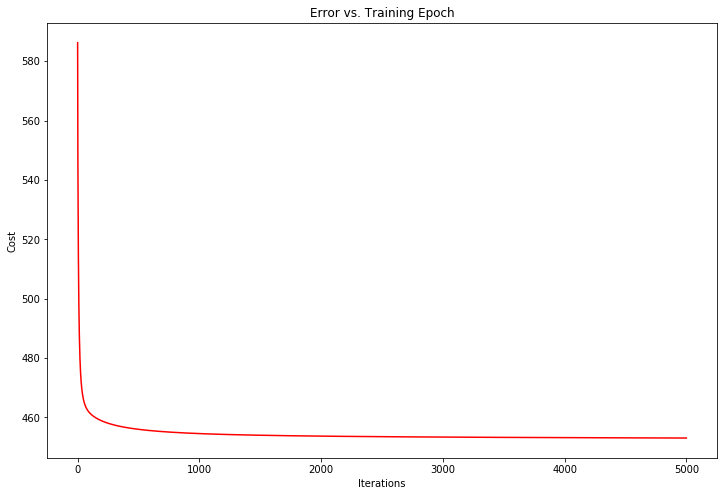

In [9]:
# plots the cost function to visualize the accuracy of theta increase
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(it), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

In [10]:
# reading test data into a dataframe
# done above

In [11]:
# Your prediction on test data
# predict y by multiplying test features and the now acurate theta
Pred = pd.DataFrame(np.matmul(df_test,theta))
print(Pred, RealY)

              0
0     12.141054
1      1.527472
2      8.023187
3      6.242879
4      7.225567
5     66.127296
6     -5.109602
7     18.283337
8     -1.724020
9      3.281409
10    -0.560583
11     2.399608
12     3.454785
13    30.247669
14    26.540367
15     7.166281
16    14.814263
17    -7.807079
18    19.816982
19    10.952197
20    -6.564473
21     4.531160
22     7.410479
23     0.434104
24     2.579617
25    -0.247594
26    -0.731233
27     0.420066
28    13.262670
29     2.330741
...         ...
7594  32.537420
7595   4.614716
7596  -0.366457
7597   3.537328
7598  -0.485395
7599  11.387961
7600   9.672629
7601  -3.968560
7602   1.798911
7603  -3.997653
7604   6.242014
7605   0.605540
7606  -4.918540
7607   3.190688
7608   7.087459
7609   2.334238
7610   8.686372
7611  15.125015
7612   0.650705
7613  32.537420
7614  -0.382090
7615   5.279276
7616   0.835419
7617   2.984495
7618 -96.842261
7619  -3.935769
7620   3.851026
7621   7.800173
7622   7.633746
7623   3.768169

[7624 r

In [12]:
# evaluation by scikit learn's mean_squared_error
# note that it is acceptable if your mean_squared_error is
# somewhere near or between 647 to 664
m.mean_squared_error(RealY,Pred)

646.8194941740851